## 📦 Importing Libraries

We'll start by importing all the essential Python libraries needed for working with images, building an SVM classifier, and visualizing results.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2


## 🗂️ Setting Dataset Paths

We define the paths for the training, validation, and testing sets based on how our dataset is structured. We are making sure the folders are named exactly like "train", "val", and "test".


In [2]:
train_dir = "/content/drive/MyDrive/Dataset (1)/Train"
val_dir = "/content/drive/MyDrive/Dataset (1)/Validation"
test_dir = "/content/drive/MyDrive/Dataset (1)/Test"


## 🖼️ Sample Training Images

Let’s look at a few images from the training set to understand the data we're working with.


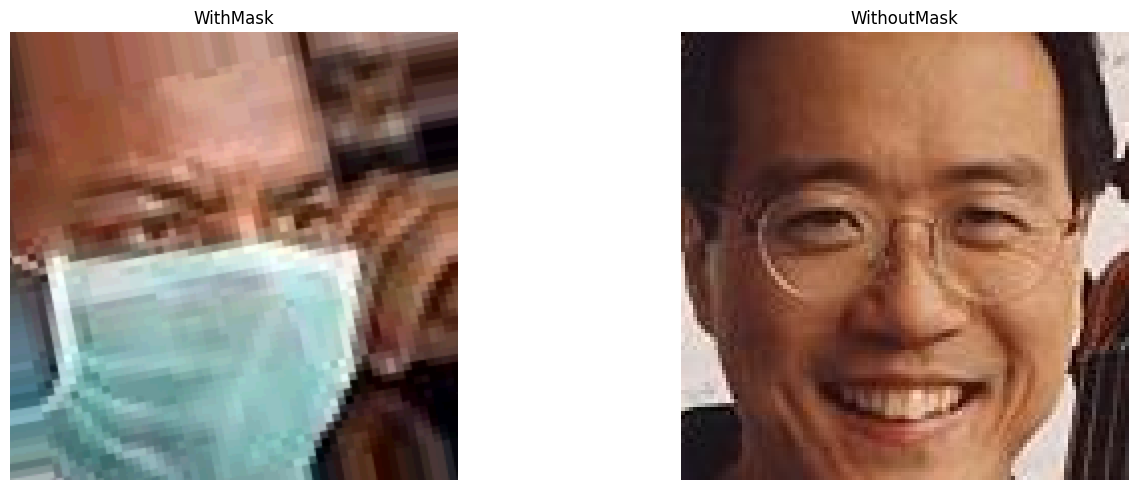

In [4]:
def show_sample_images(directory, class_names, count=5):
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(directory, class_name)
        file_name = os.listdir(class_path)[0]
        img_path = os.path.join(class_path, file_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(class_names), i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

class_labels = os.listdir(train_dir)
show_sample_images(train_dir, class_labels)


## 📥 Loading & Preprocessing Images

We'll resize the images and flatten them so that they can be used with SVM. We'll also convert labels into numeric format using label encoding.


In [5]:
def load_images_from_folder(folder, img_size=64):
    images = []
    labels = []
    for label in os.listdir(folder):
        path = os.path.join(folder, label)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                images.append(img.flatten())  # flatten to 1D
                labels.append(label)
    return np.array(images), np.array(labels)

X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(val_dir)
X_test, y_test = load_images_from_folder(test_dir)


In [6]:
# Encode class labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

## 📊 Class Distribution in Training Set

Let’s visualize the balance between classes in the training set.


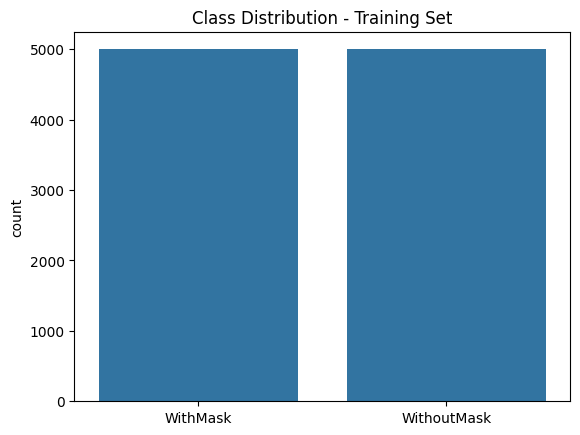

In [7]:
sns.countplot(x=y_train)
plt.title("Class Distribution - Training Set")
plt.show()


## 🤖 Training the SVM Classifier

We’ll use a linear kernel SVM and train it on the training images.


In [8]:
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train, y_train_enc)


SVC(kernel='linear', probability=True)

## 🧪 Evaluating on Validation Set

Now, let’s evaluate how well the model is doing on the validation set.


In [9]:
y_val_pred = model.predict(X_val)
print("✅ Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print("\n📄 Classification Report:\n")
print(classification_report(y_val_enc, y_val_pred, target_names=le.classes_))



✅ Accuracy: 0.9125

📄 Classification Report:

              precision    recall  f1-score   support

    WithMask       0.94      0.88      0.91       400
 WithoutMask       0.89      0.94      0.92       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



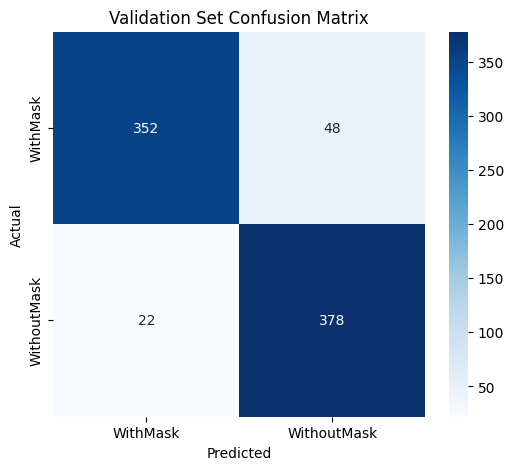

In [10]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val_enc, y_val_pred), annot=True, fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Validation Set Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## 🔍 Predicting on Test Set

We’ll now predict labels for test images and visualize a few of them along with predicted labels.


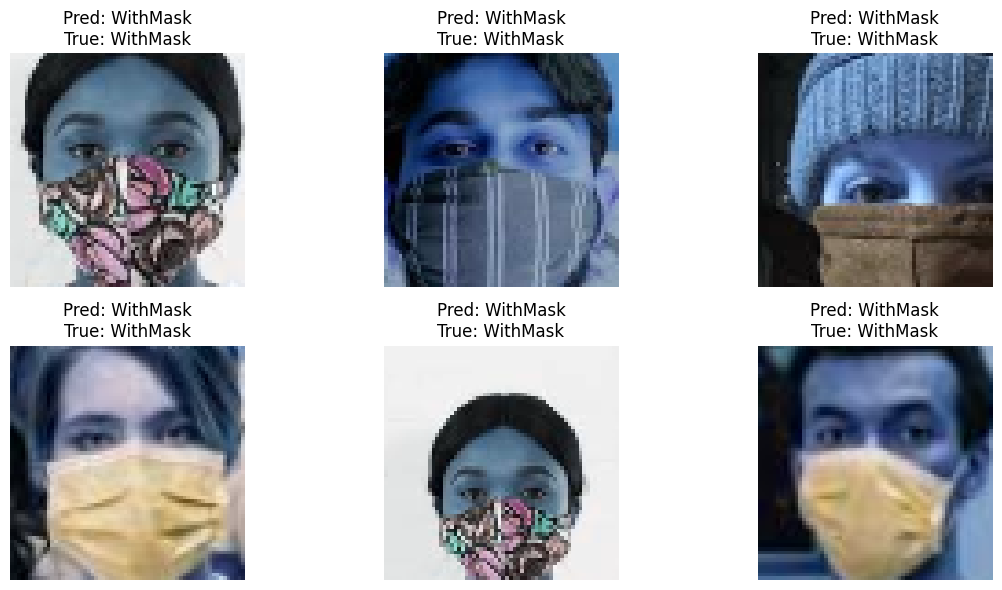

In [12]:
y_test_pred = model.predict(X_test)

# Display 6 images with predictions
plt.figure(figsize=(12, 6))
for i in range(6):
    img = X_test[i].reshape(64, 64, 3)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.astype('uint8'))
    pred_label = le.inverse_transform([y_test_pred[i]])[0]
    true_label = le.inverse_transform([y_test_enc[i]])[0]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## 💾 Saving the Model and Label Encoder

Let’s save the trained SVM model and label encoder for future use.


In [13]:
import joblib

joblib.dump(model, "svm_mask_detector.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']